In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/AT2.1

/content/gdrive/MyDrive/AT2.1


In [ ]:
#!git clone https://github.com/ultralytics/yolov5.git

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
ls

Untitled1.ipynb  yolov5/


In [ ]:
%cd yolov5

/content/gdrive/MyDrive/AT2.1/yolov5


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00


In [ ]:
#@title Setup Training YAML File
number_of_classes = 5 #@param {type:"integer"}
with open('train_yaml', 'w+') as file:
    file.write(
        f"""
        # parameters
        nc: {number_of_classes}  # number of classes
        depth_multiple: 0.33  # model depth multiple
        width_multiple: 0.50  # layer channel multiple

        # anchors
        anchors:
          - [10,13, 16,30, 33,23]  # P3/8
          - [30,61, 62,45, 59,119]  # P4/16
          - [116,90, 156,198, 373,326]  # P5/32

        # YOLOv5 backbone
        backbone:
          # [from, number, module, args]
          [[-1, 1, Focus, [64, 3]],  # 0-P1/2
           [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
           [-1, 3, BottleneckCSP, [128]],
           [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
           [-1, 9, BottleneckCSP, [256]],
           [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
           [-1, 9, BottleneckCSP, [512]],
           [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
           [-1, 1, SPP, [1024, [5, 9, 13]]],
           [-1, 3, BottleneckCSP, [1024, False]],  # 9
          ]

        # YOLOv5 head
        head:
          [[-1, 1, Conv, [512, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 6], 1, Concat, [1]],  # cat backbone P4
           [-1, 3, BottleneckCSP, [512, False]],  # 13

           [-1, 1, Conv, [256, 1, 1]],
           [-1, 1, nn.Upsample, [None, 2, 'nearest']],
           [[-1, 4], 1, Concat, [1]],  # cat backbone P3
           [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

           [-1, 1, Conv, [256, 3, 2]],
           [[-1, 14], 1, Concat, [1]],  # cat head P4
           [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

           [-1, 1, Conv, [512, 3, 2]],
           [[-1, 10], 1, Concat, [1]],  # cat head P5
           [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

           [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
          ]
        """
    )

In [ ]:
#@title Setup Dataset Configuration (Data.yaml)
train_data_dir = "/content/gdrive/MyDrive/AT2/Object_Detection/yolo/train" 
val_data_dir = "/content/gdrive/MyDrive/AT2/Object_Detection/yolo/valid" #@param {type:"string"}
test_data_dir = "/content/gdrive/MyDrive/AT2/Object_Detection/yolo/test" #@param {type:"string"}

class_names = ['Ready', 'empty_pod', 'germination', 'pod', 'young'] #@param {type:"raw"}
with open('data_yaml', 'w+') as file:
    file.write(
        f"""
        train: {train_data_dir}
        val: {val_data_dir}
        test: {test_data_dir}
        nc: {number_of_classes}
        names: {class_names}
        """
    )

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

start = datetime.now()
!python train.py --img 416 --batch 16 --epochs 50 --data data_yaml --cfg train_yaml
end = datetime.now()
print('Trainine time:', end - start)

train: weights=yolov5s.pt, cfg=train_yaml, data=data_yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, h

In [ ]:
!python detect.py --weights /content/gdrive/MyDrive/AT2.1/yolov5/runs/train/exp7/weights/best.pt --source /content/gdrive/MyDrive/AT2/Object_Detection/yolo/test/images

detect: weights=['/content/gdrive/MyDrive/AT2.1/yolov5/runs/train/exp7/weights/best.pt'], source=/content/gdrive/MyDrive/AT2/Object_Detection/yolo/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-140-g1db9533 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)

Fusing layers... 
train_yaml summary: 182 layers, 7257306 parameters, 0 gradients
image 1/226 /content/gdrive/MyDrive/AT2/Object_Detection/yolo/test/images/100003.jpg: 384x640 2 Readys, 8 empty_pods, 11 youngs, 87.1ms
image 2/226 /content/gdrive/MyDrive/AT2/Object_Detection/yolo/test/images/100011.jpg: 384x640 9 germinations, 11 youngs, 8.0m

In [ ]:
!python val.py --weights /content/gdrive/MyDrive/AT2.1/yolov5/runs/train/exp7/weights/best.pt --data data_yaml --task test

val: data=data_yaml, weights=['/content/gdrive/MyDrive/AT2.1/yolov5/runs/train/exp7/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
requirements: YOLOv5 requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.0 MB/s eta 0:00:00

requirements: 1 package updated per /content/gdrive/MyDrive/AT2.1/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-140-g1db9533 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 4

In [ ]:
import cv2
from matplotlib import pyplot as plt
from PIL import Image

# This is needed to display the images.
%matplotlib inline

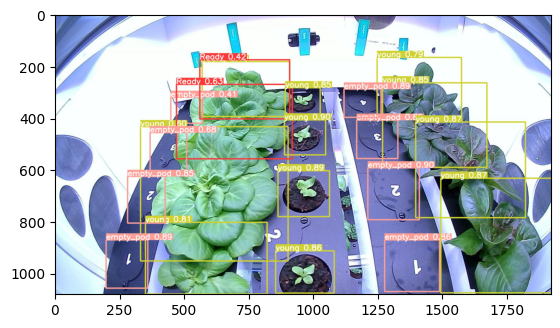

In [ ]:
image = Image.open('/content/gdrive/MyDrive/AT2.1/yolov5/runs/detect/exp5/100003.jpg')
plt.imshow(image)


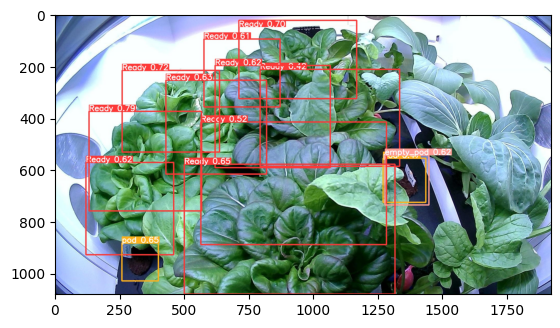

In [ ]:
image = Image.open('/content/gdrive/MyDrive/AT2.1/yolov5/runs/detect/exp5/100030.jpg')
plt.imshow(image)

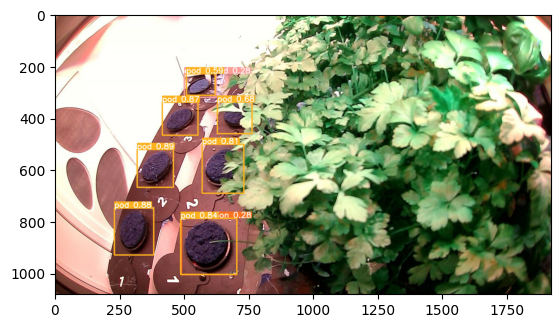

In [ ]:
plt.imshow(image)
#%%
image = Image.open('/content/gdrive/MyDrive/AT2.1/yolov5/runs/detect/exp5/100213.jpg')
plt.imshow(image)

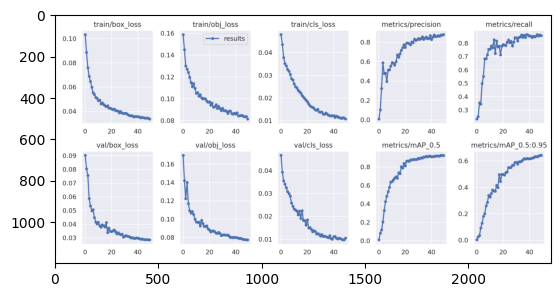

In [ ]:
image = Image.open('/content/gdrive/MyDrive/AT2.1/yolov5/runs/train/exp7/results.png') 
plt.imshow(image)